In [1]:

import matplotlib.pyplot as plt
import os
import json
import matplotlib.patches as patches
from tabulate import tabulate





In [2]:
# read all results.json files which are stored at ./{some_name}/results.json
# and plot the results

def read_results():
    results = []
    for root, dirs, files in os.walk('.'):
        for file in files:
            if file == 'results.json':
                with open(os.path.join(root, file), 'r') as f:
                    obj_dict = json.load(f)
                    obj_dict["fname"] = root
                    results.append(obj_dict)
    return results


In [3]:
print(read_results())

[{'name': 'fasterrcnn_resnet50_fpn', 'pretrained': True, 'freeze_layers': False, 'batch_size': 4, 'dataset': 'kitti_reduced_0', 'dataset_config': {'class_list': ['Background', 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc', 'DontCare'], 'num_classes': 10}, 'val_iou': 0.21436335146427155, 'val_precision': 0.9272402013811671, 'val_recall': 0.9028998393018824, 'val_f1': 0.9147551934597634, 'val_map': 0.8253285299204705, 'test_iou': 0.22484898567199707, 'test_precision': 0.942324879280003, 'test_recall': 0.9056595847772438, 'test_f1': 0.9229314551067778, 'test_map': 0.853039074251984, 'Car_ap': 0.9708268104130604, 'Van_ap': 0.9319061615359394, 'Truck_ap': 0.9211581269787984, 'Pedestrian_ap': 0.8181998809963102, 'Person_sitting_ap': 0.416017215555605, 'Cyclist_ap': 0.8347617037468572, 'Tram_ap': 0.9304941609771704, 'Misc_ap': 0.7792641791600221, 'fname': './kitti_reduced_0_fasterrcnn_resnet50_fpn_5_pretrained'}, {'name': 'fasterrcnn_mobilenet_v3_large_fpn',

67 67


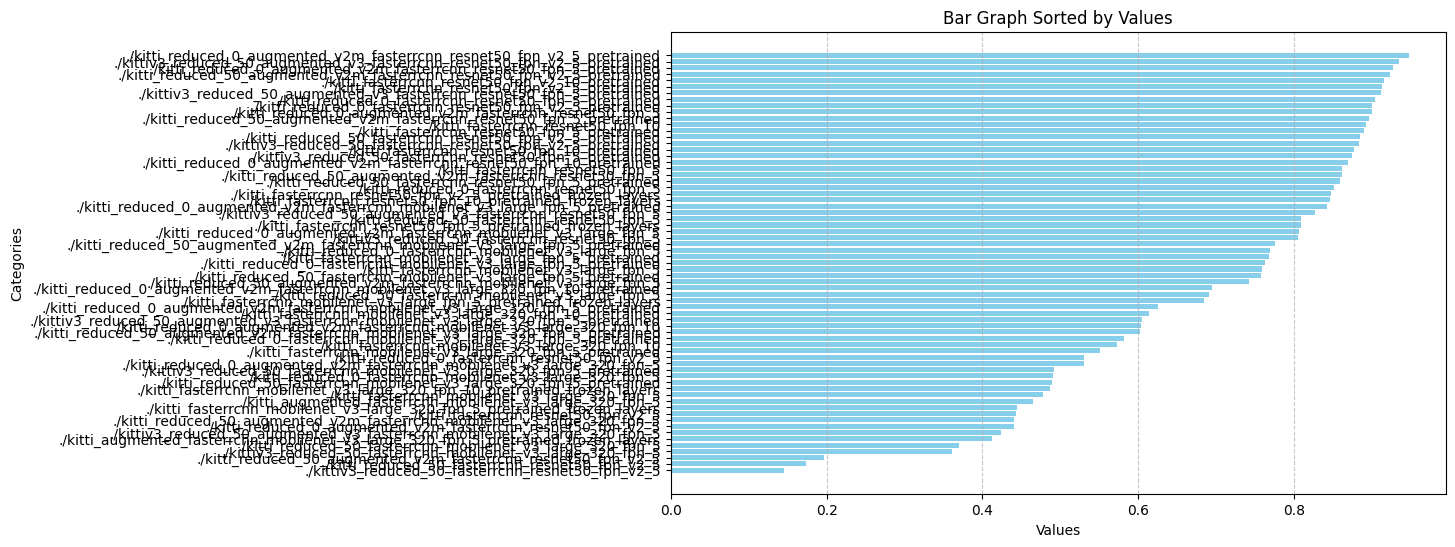

In [4]:
# plot all "test_precision" values
# x axis: name
# y axis: test_precision
# There are 15 total. Also format the plot nicely.

results = read_results()
names = []
test_precisions = []
for result in results:
    names.append(result['fname'])
    test_precisions.append(result['val_recall'])

# sort the names and test_precisions
names, test_precisions = zip(*sorted(zip(names, test_precisions), key=lambda x: x[1]))

print(len(names), len(test_precisions) )

plt.figure(figsize=(10, 6))
plt.barh(names, test_precisions, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Bar Graph Sorted by Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



In [27]:
results = read_results()
file_to_name = {}

# pair results that contain augmented with the ones that don't
# Find all results with "augmented" in the fname, then find their corresponding results without. The substrings of the fname will be the same after "fasterrcnn"
def replace_underscores_with_spaces(s):
    return s.replace("_", " ")


augmented_v2 = []
non_augmented_v2 = []
augmented_v3 = []
non_augmented_v3 = []
for result in results:
    filename = result['fname']
    index_frcnn_aug = filename.find('fasterrcnn') + 11
    if "augmented" in filename and "kittiv3" in filename:
        augmented_v3.append(result)
        file_to_name[filename] = replace_underscores_with_spaces(filename[index_frcnn_aug:]) + " augmented kittiv3"
    # elif "augmented" in filename:
    #     augmented_v2.append(result)
        # file_to_name[filename] = filename[index_frcnn_aug:].split("_")   + " augmented kittiv2"
    elif "kittiv3" in filename:
        non_augmented_v3.append(result)
        file_to_name[filename] = replace_underscores_with_spaces(filename[index_frcnn_aug:])  + " non-augmented kittiv3"
    # else:
    #     non_augmented_v2.append(result)
    #     file_to_name[filename] = filename[index_frcnn_aug:].split("_") + " non-augmented kittiv2"


fname_map = {}
pairs = []
for aug in augmented_v2:
    for non_aug in non_augmented_v2:
        if fname_map.get(aug['fname']) or fname_map.get(non_aug['fname']):
            continue
        red_50_aug = 'reduced_50'  in aug['fname']
        red_50_non_aug = 'reduced_50' in non_aug['fname']

        
        index_frcnn_aug = aug['fname'].find('fasterrcnn') 
        index_frcnn_non_aug = non_aug['fname'].find('fasterrcnn') 
        
        if aug['fname'][index_frcnn_aug:] == non_aug['fname'][index_frcnn_non_aug:] and red_50_aug == red_50_non_aug :
            fname_map[aug['fname']] = True
            fname_map[non_aug['fname']] = True
            pairs.append((aug, non_aug))
        
for aug in augmented_v3:
    for non_aug in non_augmented_v3:
        if fname_map.get(aug['fname']) or fname_map.get(non_aug['fname']):
            continue
        red_50_aug = 'reduced_50'  in aug['fname']
        red_50_non_aug = 'reduced_50' in non_aug['fname']
        red_0_aug = 'reduced_0'  in aug['fname']
        red_0_non_aug = 'reduced_0' in non_aug['fname']

        
        index_frcnn_aug = aug['fname'].find('fasterrcnn')
        index_frcnn_non_aug = non_aug['fname'].find('fasterrcnn')
        if aug['fname'][index_frcnn_aug:] == non_aug['fname'][index_frcnn_non_aug:] and red_50_aug == red_50_non_aug  and red_0_aug == red_0_non_aug: 
            fname_map[aug['fname']] = True
            fname_map[non_aug['fname']] = True
            pairs.append((aug, non_aug))

print(len(pairs))



5


In [28]:
files = ['./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_fpn_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kitti_reduced_50_augmented_v2m_fasterrcnn_resnet50_fpn_5', './kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained']

"""
./kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained
./kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
./kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5
./kittiv3_reduced_50_fasterrcnn_resnet50_fpn_5_pretrained
./kittiv3_reduced_50_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
./kitti_reduced_50_augmented_v2m_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained
"""



"""
    "val_iou": 0.15061259269714355,
    "val_precision": 0.8777058185109722,
    "val_recall": 0.8472284689239467,
    "val_f1": 0.8617229889282549,
    "val_map": 0.7535181167185725,
    "test_iou": 0.1488405168056488,
    "test_precision": 0.8977682784428451,
    "test_recall": 0.8718351066783168,
    "test_f1": 0.8839659183253943,
    "test_map": 0.787337166822575,
    "Car_ap": 0.9618524469118936,
    "Van_ap": 0.9036627634481775,
    "Truck_ap": 0.8697219475156159,
    "Pedestrian_ap": 0.8104007468515242,
    "Person_sitting_ap": 0.35255985110292737,
    "Cyclist_ap": 0.8134884957482047,
    "Tram_ap": 0.6580914074873214,
    "Misc_ap": 0.6583672746829147
"""
key_to_label = {
    "val_iou": "Validation IoU",
    "val_precision": "Validation Precision",
    "val_recall": "Validation Recall",
    "val_f1": "Validation F1",
    "val_map": "Validation mAP",
    "test_iou": "Test IoU",
    "test_precision": "Test Precision",
    "test_recall": "Test Recall",
    "test_f1": "Test F1",
    "test_map": "Test mAP",
    "Car_ap": "Car AP",
    "Van_ap": "Van AP",
    "Truck_ap": "Truck AP",
    "Pedestrian_ap": "Pedestrian AP",
    "Person_sitting_ap": "Person sitting AP",
    "Cyclist_ap": "Cyclist AP",
    "Tram_ap": "Tram AP",
    "Misc_ap": "Misc AP",
}


['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
val_iou
[0.19852690398693085, 0.22772890329360962, 0.1784510612487793, 0.15109871327877045, 0.17244769632816315]
[0.2031422257423401, 0.23782794177532196, 0.18358096480369568, 0.13716161251068115, 0.1588917076587677]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


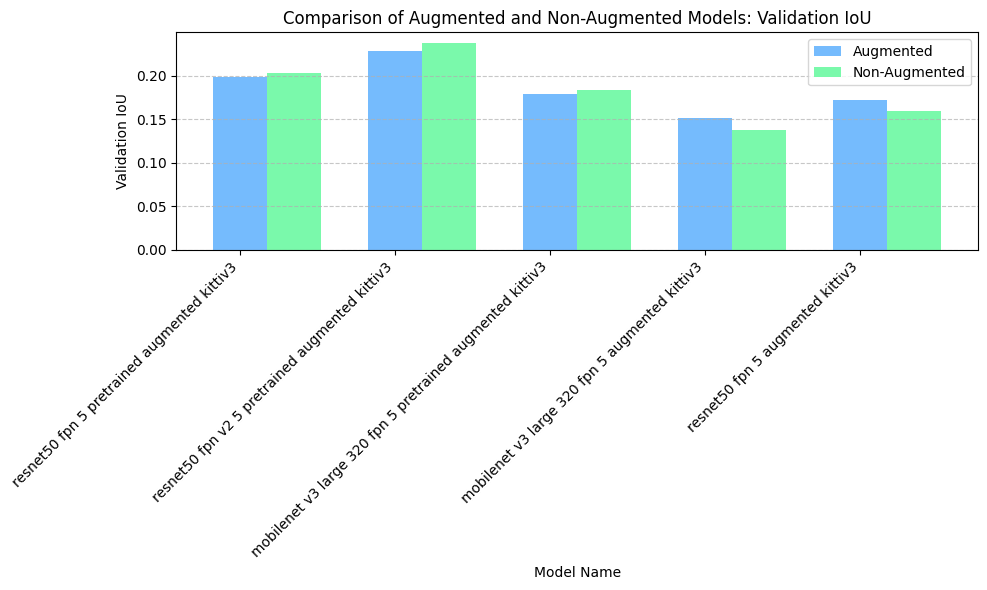

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
val_precision
[0.9296960959663211, 0.9516878242770445, 0.7068067362821089, 0.5768034576971831, 0.8489026509867839]
[0.899409540658682, 0.9167654230185456, 0.6074619846400265, 0.501550920714614, 0.830200430706176]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


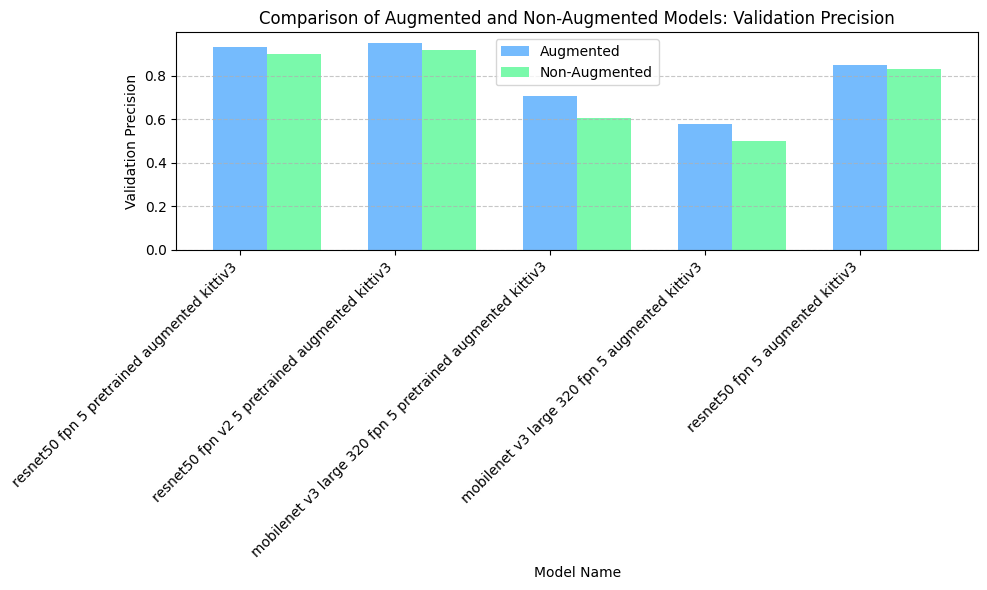

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
val_recall
[0.9110001668753376, 0.9338947114005789, 0.6047231182083727, 0.4240269375386771, 0.8271030090807846]
[0.8737801493786505, 0.8834641005834971, 0.491216070453212, 0.36129071928452283, 0.804590215505499]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


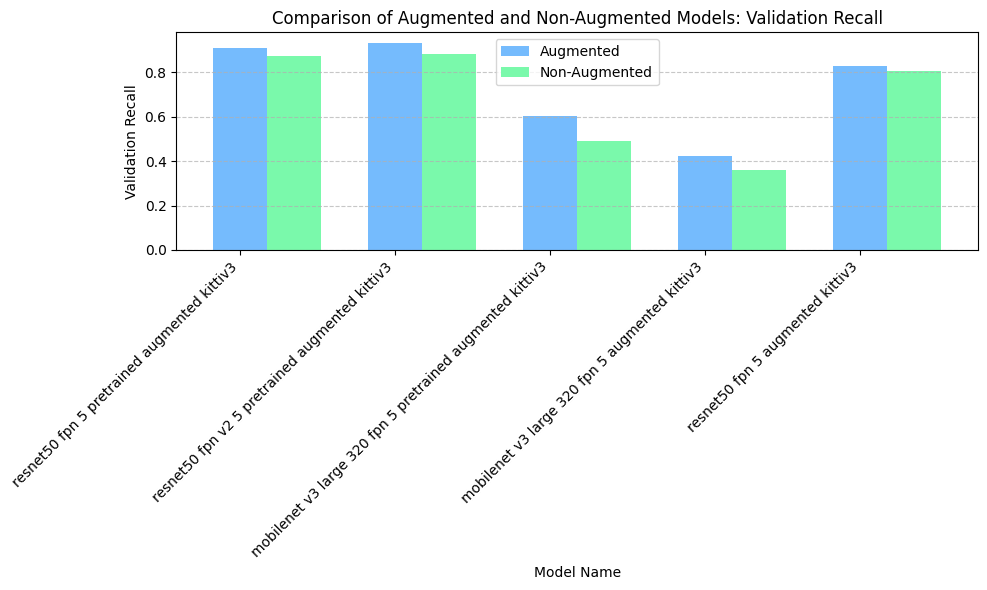

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
val_f1
[0.9201735259678671, 0.942575454906823, 0.6486820353100847, 0.48159064859755796, 0.8376971472532663]
[0.8862431531611484, 0.8993771223050582, 0.5386558425053869, 0.4111361908303434, 0.816808665034561]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


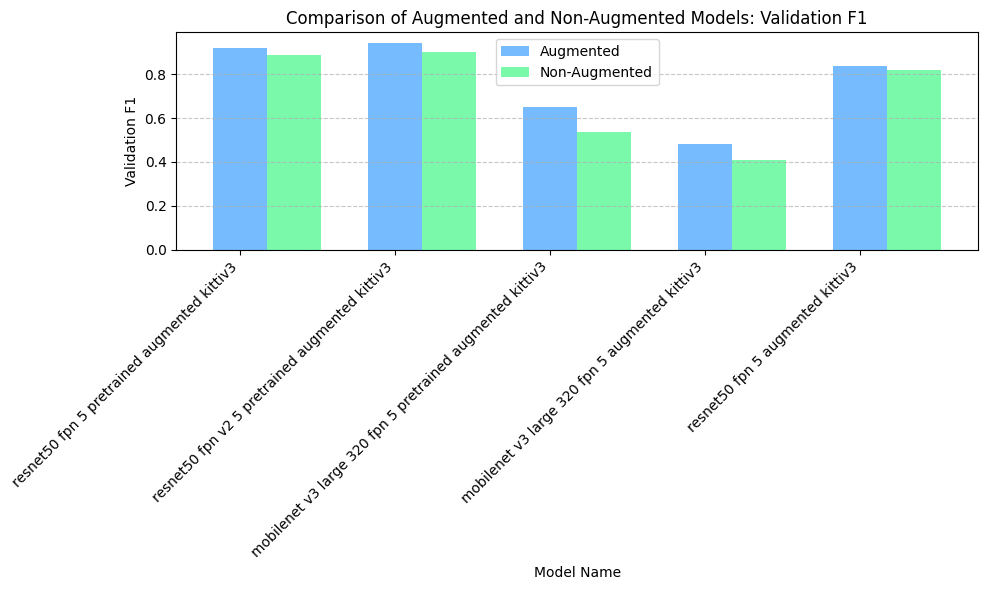

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
val_map
[0.8467218828782926, 0.8840148125859852, 0.4505748447831472, 0.27483884299139455, 0.6962899378750961]
[0.778970710381091, 0.8078433831294487, 0.3311805975826365, 0.2034365193395979, 0.6760122480021877]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


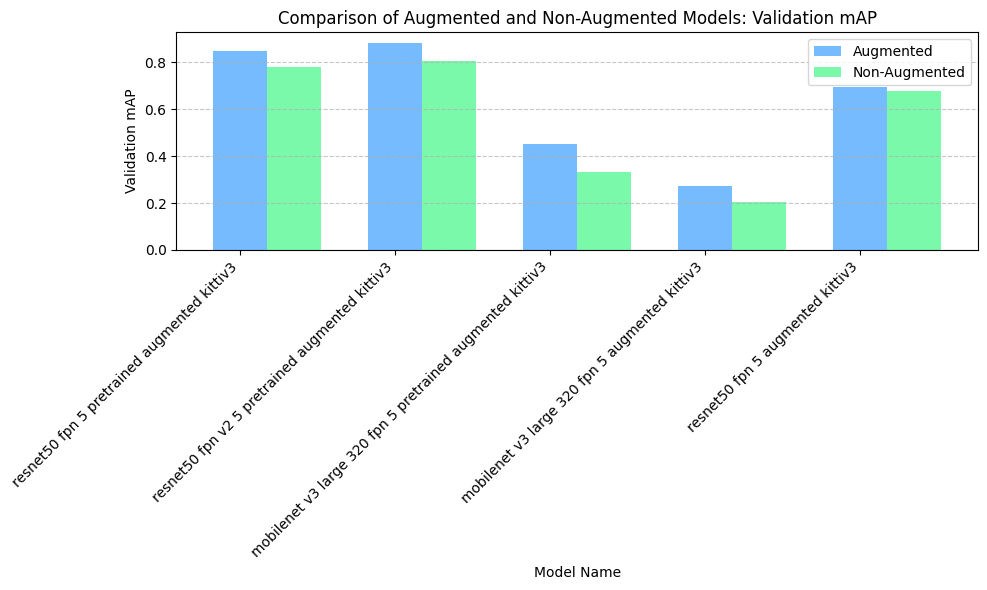

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
test_iou
[0.18974675238132477, 0.2274077981710434, 0.17180819809436798, 0.1488558053970337, 0.16811545193195343]
[0.21203312277793884, 0.24318435788154602, 0.1865393966436386, 0.13604669272899628, 0.1571110337972641]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


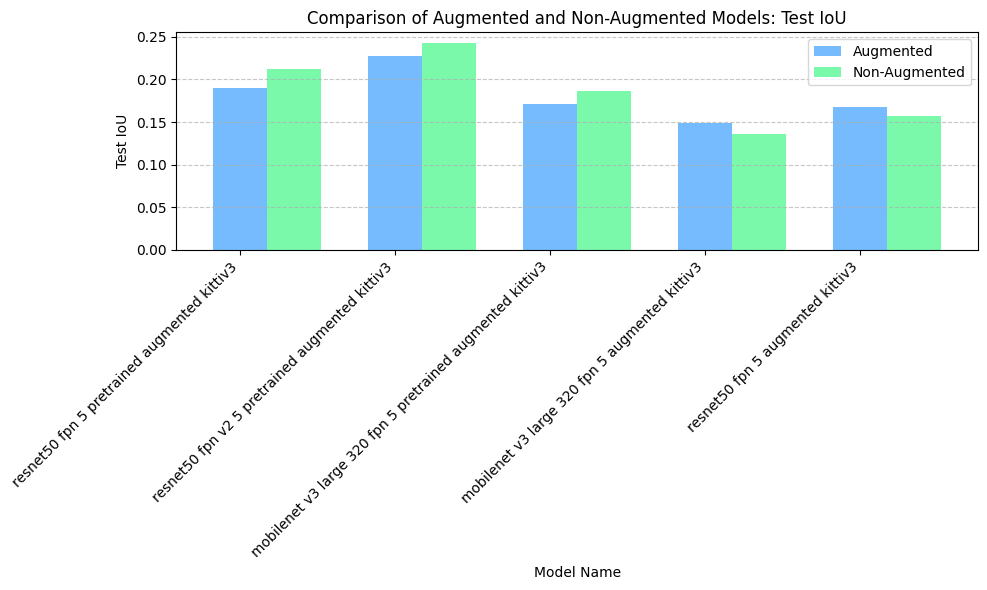

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
test_precision
[0.9264051757013448, 0.944205036510108, 0.6743314066595276, 0.5969657489706576, 0.8300553518459615]
[0.9124373643327334, 0.9153500312516274, 0.6457480932179398, 0.5202015045829147, 0.857227164429294]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


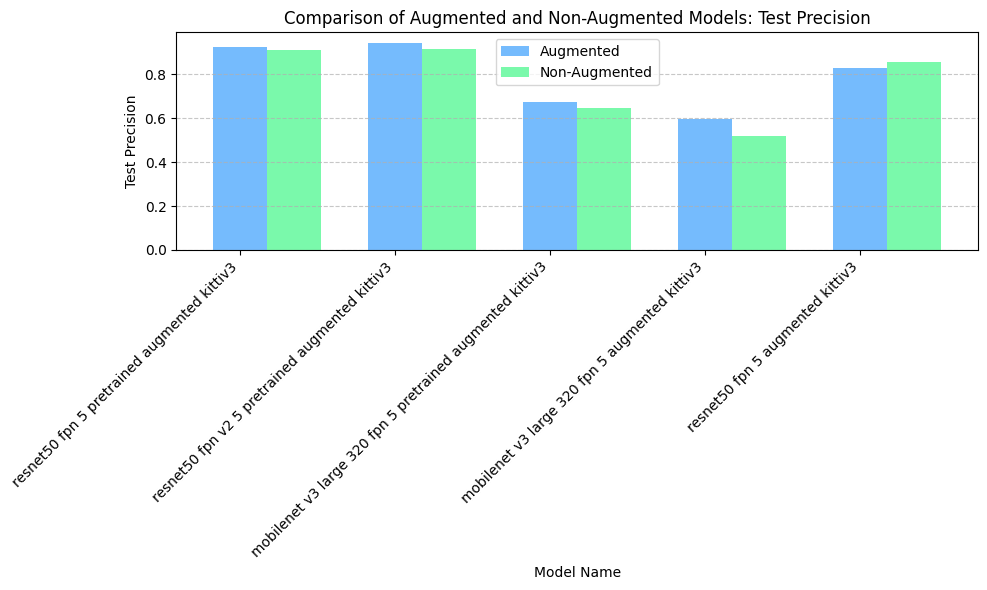

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
test_recall
[0.905037016311853, 0.9243247758451468, 0.5688036637255858, 0.4098446830505872, 0.8013105543436232]
[0.8793337042643932, 0.8882349613922805, 0.5521072819679238, 0.38355046299876056, 0.8157003692162665]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


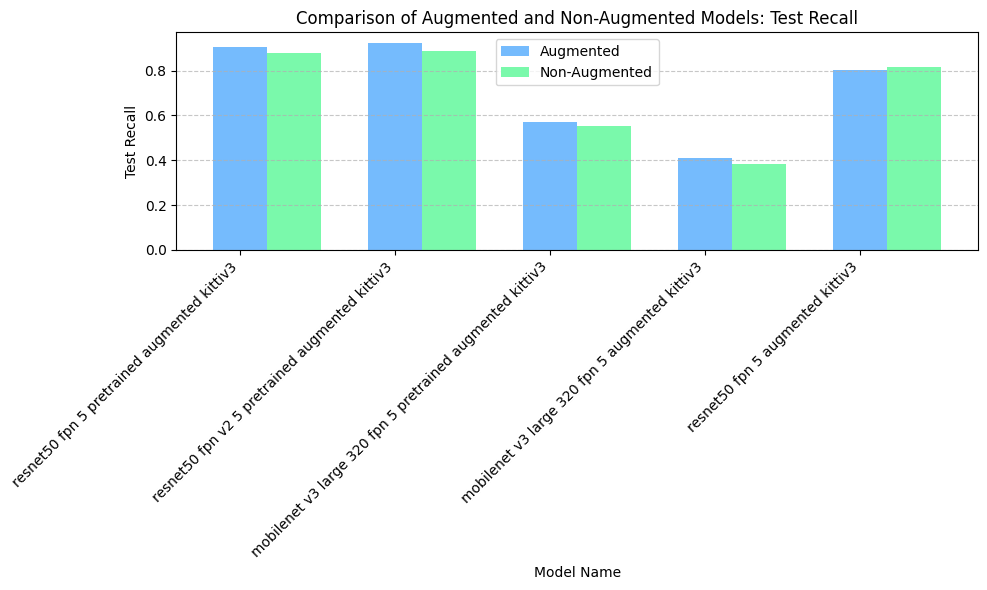

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
test_f1
[0.9154467774130786, 0.9339865090192382, 0.6133339621644954, 0.4782275469971623, 0.8151997849583064]
[0.8948665174201815, 0.9009669033171516, 0.5924854751926275, 0.4341922520148575, 0.8350373266017748]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


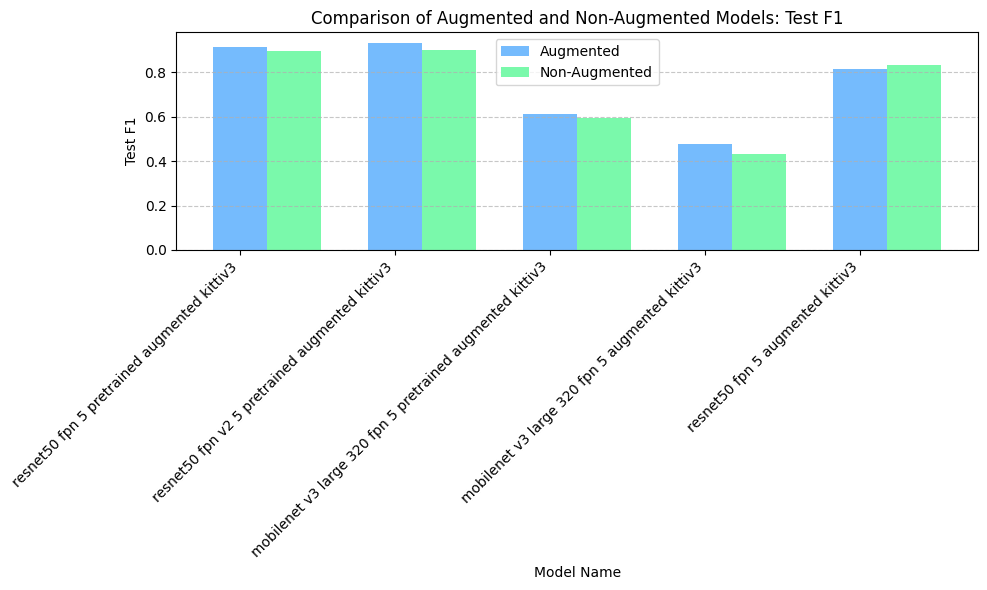

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
test_map
[0.8266947362264991, 0.8589752088716869, 0.37770145923814535, 0.25153248677229817, 0.6679639423001434]
[0.7925787733467073, 0.8270921803410212, 0.3687066794655409, 0.22191716652710264, 0.7042177165355946]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


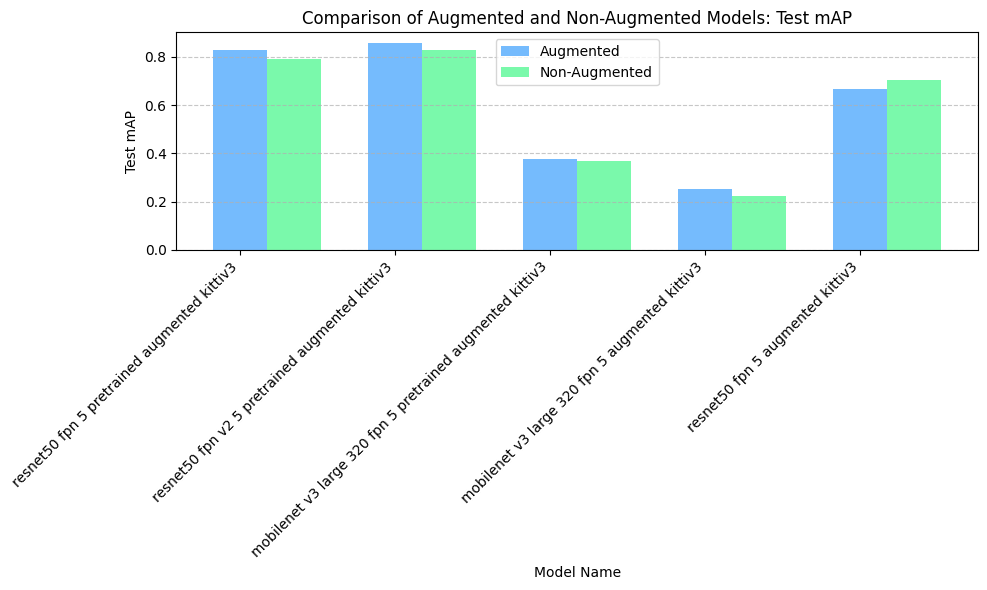

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Car_ap
[0.9554751314211549, 0.9610703585234985, 0.6017214059659433, 0.5282175480605227, 0.9394509606619994]
[0.9644711316981076, 0.9718280495465199, 0.6158284568582241, 0.5262424014266602, 0.9546977726243484]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


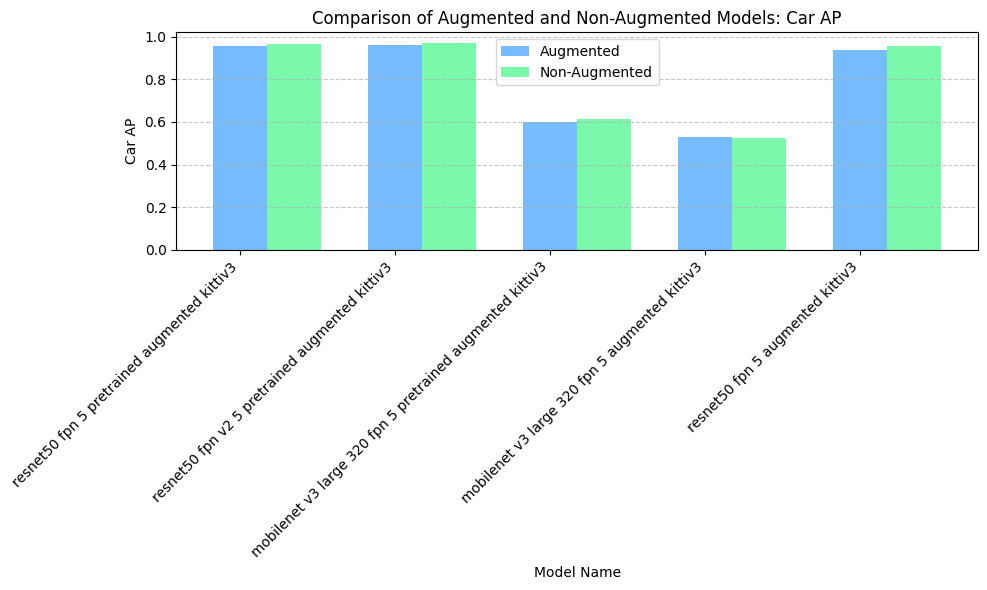

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Van_ap
[0.8705948660201865, 0.9242417723806826, 0.40343093625316995, 0.26292791772172364, 0.7610890232139118]
[0.922180894460099, 0.9355074084921599, 0.3807244443398462, 0.24783127275741892, 0.868360373856679]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


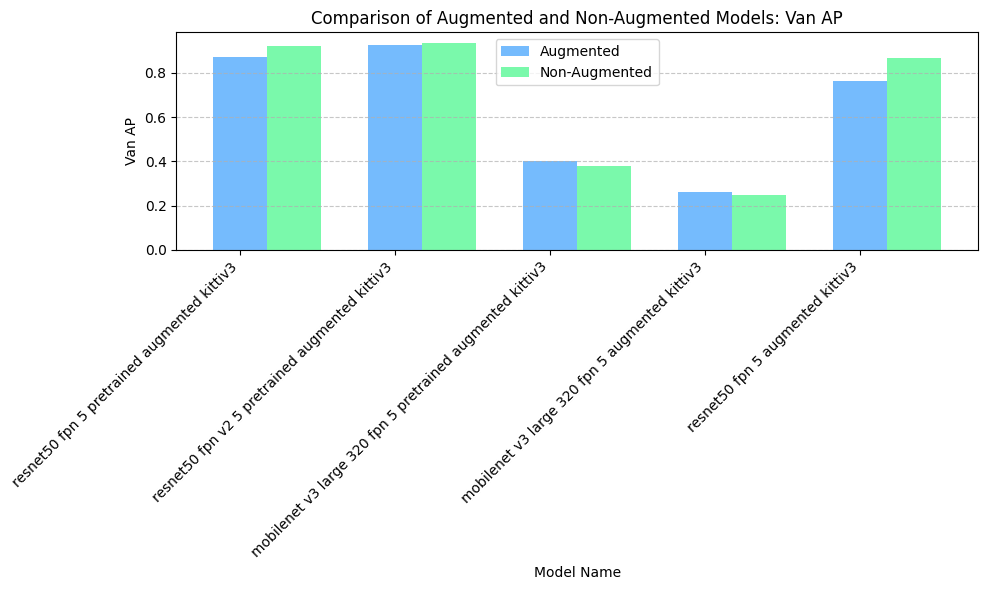

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Truck_ap
[0.8684236937899644, 0.8955524978344749, 0.47261884569681567, 0.39537592783168385, 0.6974560920144541]
[0.8904299729951309, 0.9085157586183701, 0.48035109120480923, 0.30717530192875475, 0.7774814452611852]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


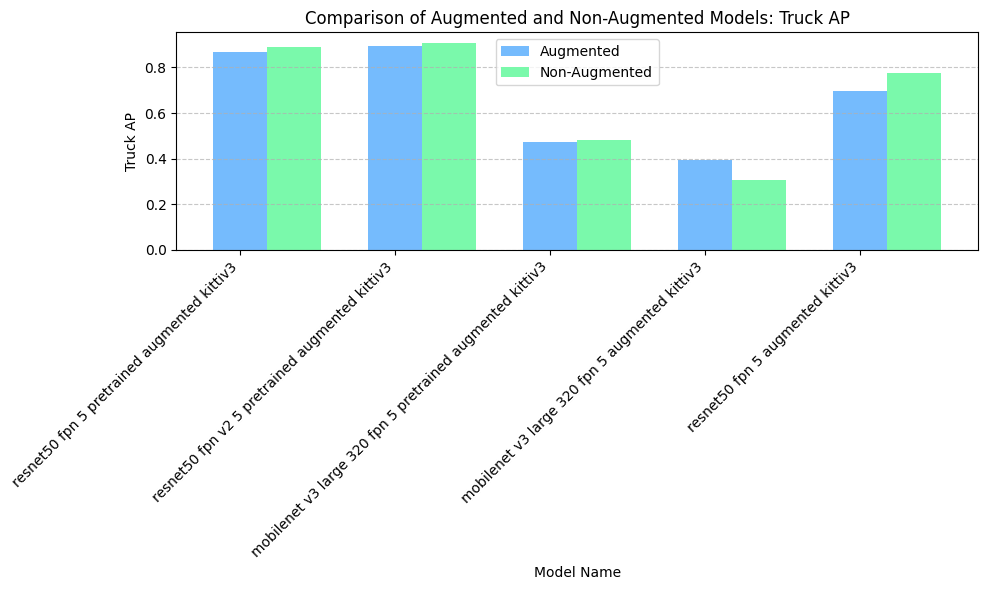

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Pedestrian_ap
[0.8527006928534462, 0.8506062079603941, 0.3800926584556529, 0.25623352662323834, 0.7452568201986034]
[0.762068796743749, 0.8168111349443397, 0.36861722052108514, 0.21561838684923873, 0.6434866631931173]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


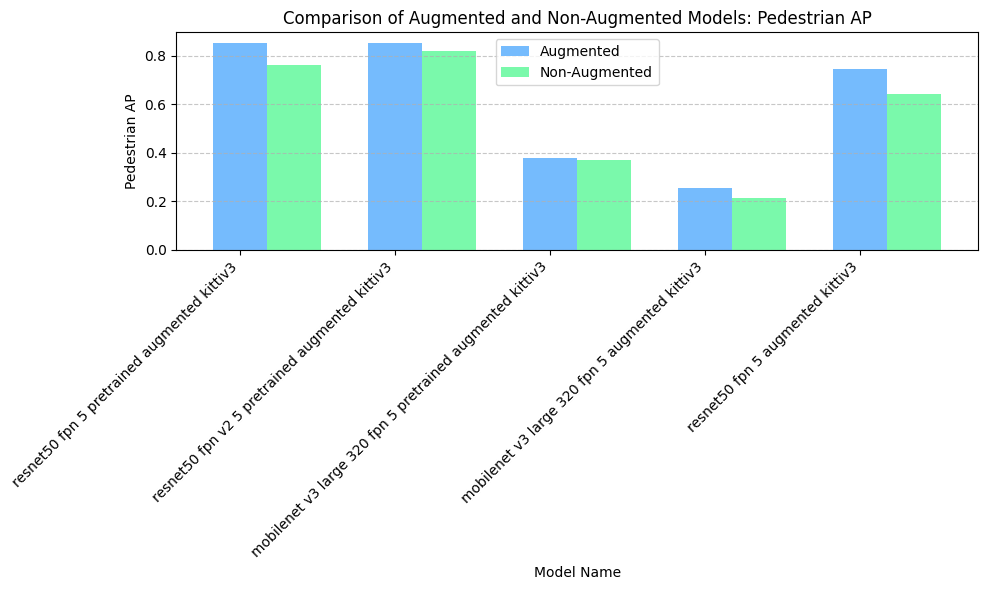

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Person_sitting_ap
[0.7638614604922789, 0.878753421865222, 0.7561895043924893, 0.246097804492489, 0.40372116526739055]
[0.416017215555605, 0.2597013444082996, 0.023809518271412138, 0.00769230556213065, 0.15021225846004854]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


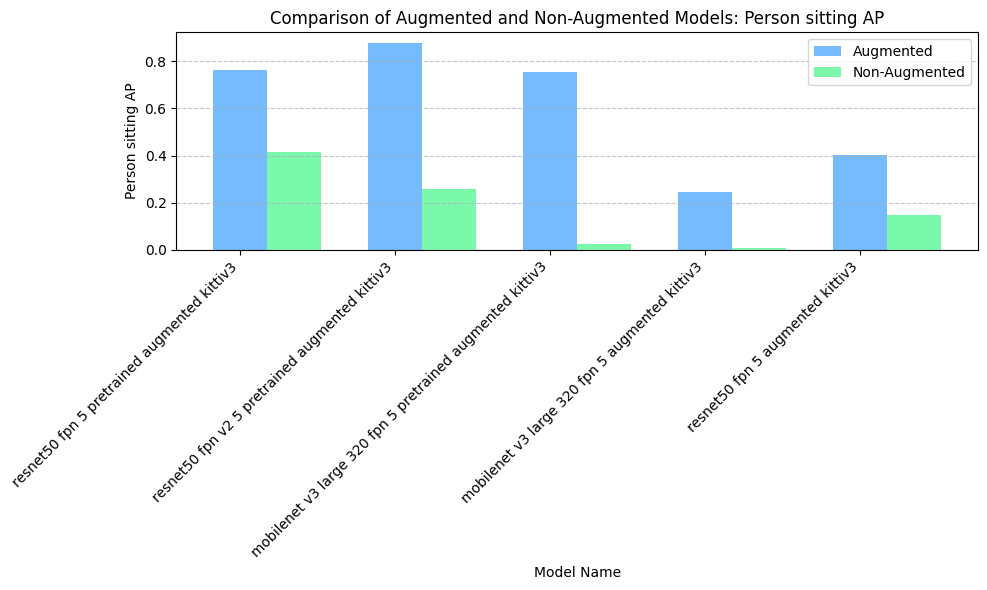

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Cyclist_ap
[0.7580145486981498, 0.8388660733378163, 0.20627477701830896, 0.1238738117884594, 0.619295469827751]
[0.8235190694783706, 0.8187557438062847, 0.3151251306866266, 0.11422496710935719, 0.6584659788757659]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


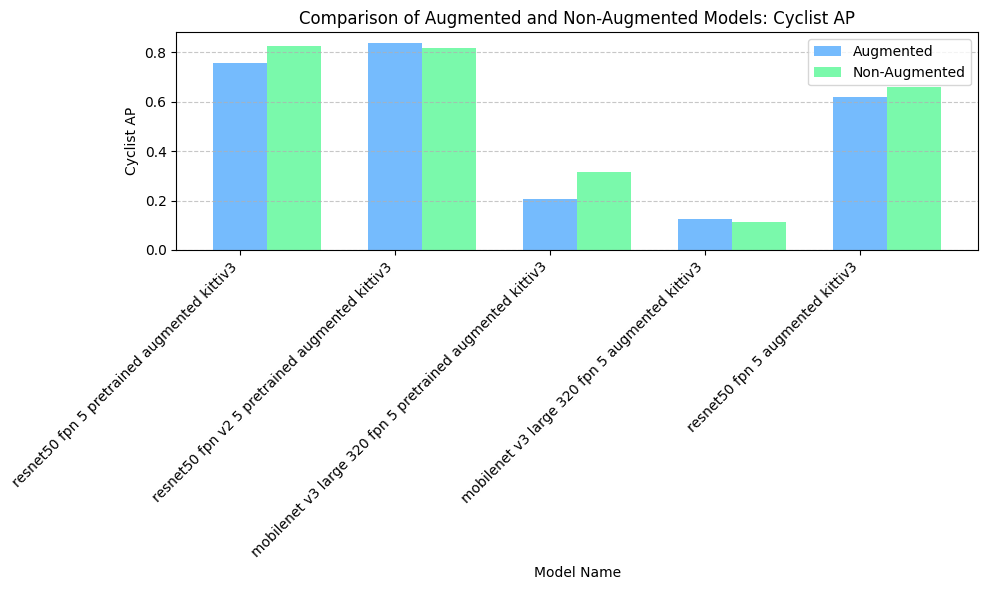

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Tram_ap
[0.9480877325837425, 0.9480877325837425, 0.5644190117172974, 0.23746409900945323, 0.931965274993973]
[0.8750408195227223, 0.9304941609771704, 0.31310912442518996, 0.12926627732238452, 0.883684287181039]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


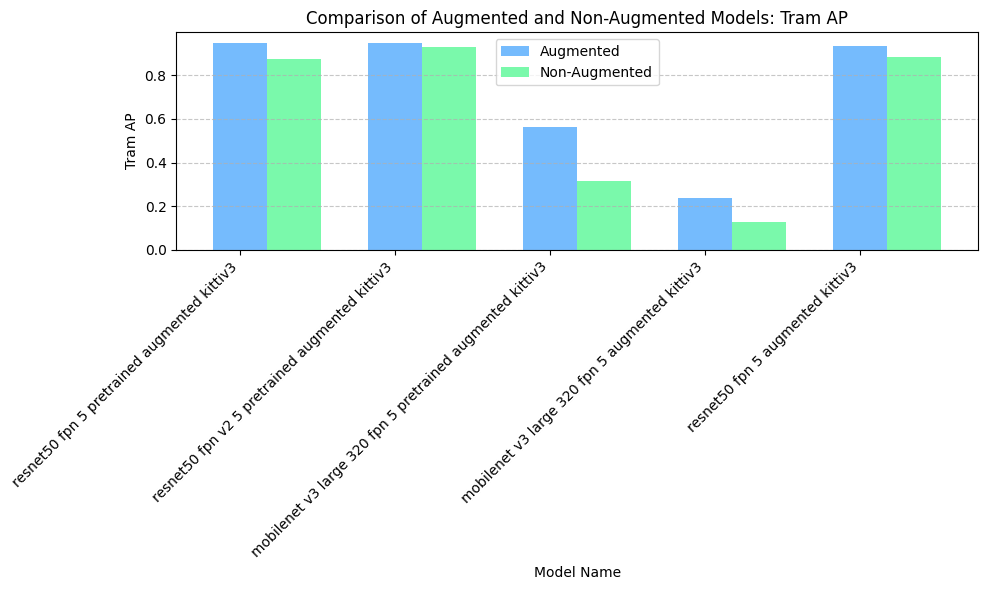

['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']
Misc_ap
[0.7566169371674178, 0.7749404362020506, 0.21985161876549994, 0.14852010840358626, 0.4720846968226856]
[0.5780377825949441, 0.8211334642424452, 0.15187979435389856, 0.07944124176083814, 0.4717092045653193]
['./kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_v2_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5_pretrained', './kittiv3_reduced_50_augmented_v3_fasterrcnn_mobilenet_v3_large_320_fpn_5', './kittiv3_reduced_50_augmented_v3_fasterrcnn_resnet50_fpn_5']


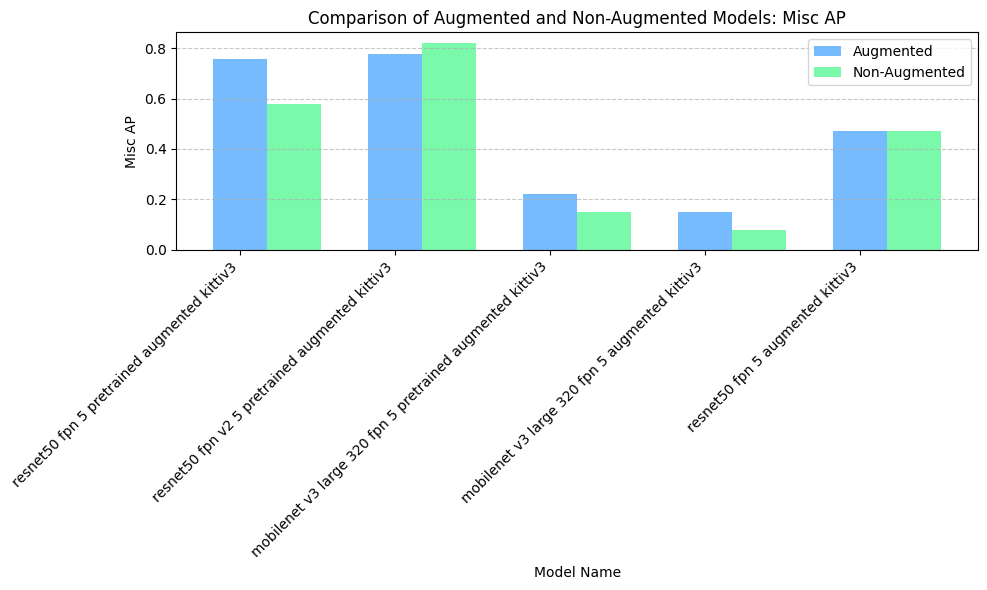

In [29]:
# Graph a bar chart where each pair is a group of two bars. The x axis will be the name of the model, and the y axis will be the test_precision. The two bars will be side by side, one for the augmented model and one for the non-augmented model. The title of the graph will be "Comparison of Augmented and Non-Augmented Models". The x axis label will be "Model Name" and the y axis label will be "Test Precision". The bars will be colored differently. The graph will be displayed.
"""
    "val_iou": 0.15061259269714355,
    "val_precision": 0.8777058185109722,
    "val_recall": 0.8472284689239467,
    "val_f1": 0.8617229889282549,
    "val_map": 0.7535181167185725,
    "test_iou": 0.1488405168056488,
    "test_precision": 0.8977682784428451,
    "test_recall": 0.8718351066783168,
    "test_f1": 0.8839659183253943,
    "test_map": 0.787337166822575,
    "Car_ap": 0.9618524469118936,
    "Van_ap": 0.9036627634481775,
    "Truck_ap": 0.8697219475156159,
    "Pedestrian_ap": 0.8104007468515242,
    "Person_sitting_ap": 0.35255985110292737,
    "Cyclist_ap": 0.8134884957482047,
    "Tram_ap": 0.6580914074873214,
    "Misc_ap": 0.6583672746829147
"""

all_keys = ['val_iou', 'val_precision', 'val_recall', 'val_f1', 'val_map', 'test_iou', 'test_precision', 'test_recall', 'test_f1', 'test_map', 'Car_ap', 'Van_ap', 'Truck_ap', 'Pedestrian_ap', 'Person_sitting_ap', 'Cyclist_ap', 'Tram_ap', 'Misc_ap']

file_to_name
for idx, key_y in enumerate(all_keys):
        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        index = range(len(pairs))
        print([pair[0]["fname"] for pair in pairs])
        print(key_y)
        print([pair[0][key_y] for pair in pairs])
        print([pair[1][key_y] for pair in pairs])
        plt.bar(index, [pair[0][key_y] for pair in pairs], bar_width, label='Augmented', color='xkcd:sky blue')
        plt.bar([i + bar_width for i in index], [pair[1][key_y] for pair in pairs], bar_width, label='Non-Augmented', color='xkcd:seafoam green')
        plt.xlabel('Model Name')
        plt.ylabel(key_to_label[key_y])
        plt.title('Comparison of Augmented and Non-Augmented Models: ' + key_to_label[key_y])
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        # x axiz labels must be bigger
        # plt.xticks(index, [file_to_name[pair[0]["fname"]] for pair in pairs], rotation=45, ha='right')
        plt.tight_layout()
        # download plot as image to folder called "graphs"
        plt.savefig(f'graphs/{key_y}-{len(pairs)}.png')

        print([pair[0]["fname"] for pair in pairs])
        plt.show()

In [30]:
# do the same as above but make them into plain text tables

# for idx, key_y in enumerate(all_keys):
#     print(key_to_label[key_y])
#     print("Model Name".ljust(50), "Augmented".ljust(20), "Non-Augmented".ljust(20))
#     for pair in pairs:
#         print(file_to_name[pair[0]["fname"]].ljust(50), str(pair[0][key_y]).ljust(20), str(pair[1][key_y]).ljust(20))
#     print("\n\n")
    
# make a data frame

df = []
# EDIT THIS LINE TO CREATE LATEX TABLE
key_y = 'test_precision'
for pair in pairs:
    df.append([file_to_name[pair[0]["fname"]], pair[0][key_y], pair[1][key_y]])

# print(tabulate(df, headers=["Model Name", "Augmented", "Non-Augmented"], tablefmt='grid'))


latex_table = tabulate(df, headers=[
    "Model Name",
    "Augmented",
    "Non-Augmented"

], tablefmt='latex', showindex=False)

# Add table environment and caption/label
title = 'Comparison of Augmented and Non-Augmented Models: ' + key_to_label[key_y]

latex_code = f"""
\\begin{{table}}[h!]
\\centering

{latex_table}
\\caption{{Benchmark results for various machine learning models: {title}}}
\\label{{tab:benchmark_results}}
\\end{{table}}
"""


print(latex_code)



\begin{table}[h!]
\centering

\begin{tabular}{lrr}
\hline
 Model Name                                                &   Augmented &   Non-Augmented \\
\hline
 resnet50 fpn 5 pretrained augmented kittiv3               &    0.926405 &        0.912437 \\
 resnet50 fpn v2 5 pretrained augmented kittiv3            &    0.944205 &        0.91535  \\
 mobilenet v3 large 320 fpn 5 pretrained augmented kittiv3 &    0.674331 &        0.645748 \\
 mobilenet v3 large 320 fpn 5 augmented kittiv3            &    0.596966 &        0.520202 \\
 resnet50 fpn 5 augmented kittiv3                          &    0.830055 &        0.857227 \\
\hline
\end{tabular}
\caption{Benchmark results for various machine learning models: Comparison of Augmented and Non-Augmented Models: Test Precision}
\label{tab:benchmark_results}
\end{table}

